In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
signal_tree = Tree( fc.sr.NMSSM_MX_700_MY_400 )
bkg_tree = Tree( fc.sr.QCD_B_List + [fc.sr.TTJets])

In [3]:
trees = [signal_tree,bkg_tree]

In [4]:
def calc_n_higgs(tree):
    n_t6_higgs = ak.sum( tree["t6_higgs_signalId"] != -1,axis=-1 )
    n_nn_higgs = ak.sum( tree["nn_higgs_signalId"] != -1,axis=-1 )
    tree.extend( nfound_t6_h = n_t6_higgs,nfound_nn_h = n_nn_higgs )
for tree in trees: calc_n_higgs(tree)

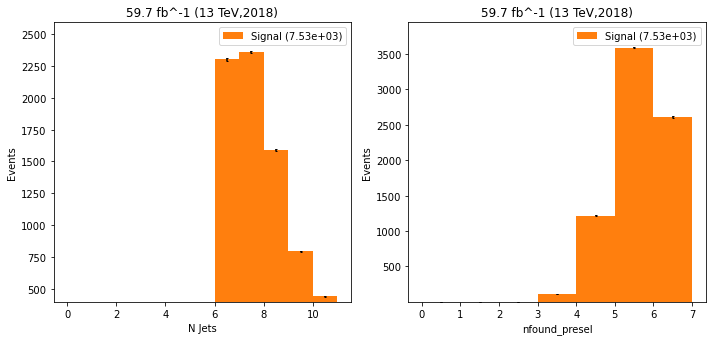

In [5]:
study.quick(signal_tree,varlist=["n_jet","nfound_presel"],binlist=(range(12),range(8)))

In [6]:
labels = dict(labels=["Top 6 Jets","NN 6 Jets"])
colors = dict(s_colors=['r','g'])
attrs = dict(**labels,**colors)

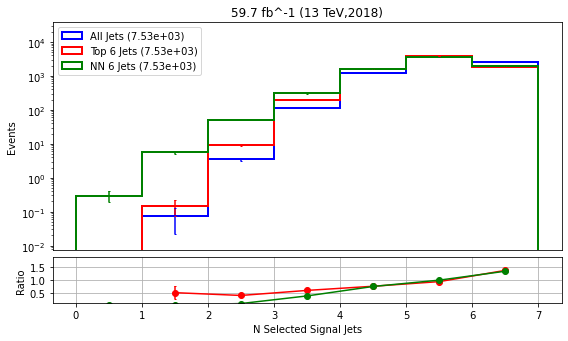

In [7]:
study.overlay(signal_tree,varlist=["nfound_presel","nfound_t6","nfound_nn"],labels=["All Jets","Top 6 Jets","NN 6 Jets"],ratio=1,s_colors=["b","r","g"],xlabel="N Selected Signal Jets",bins=range(8),log=1)

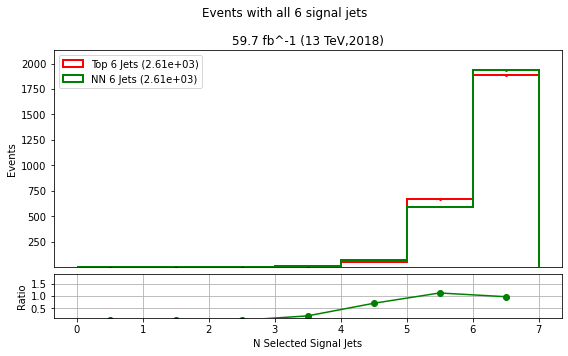

In [8]:
study.overlay(signal_tree,varlist=["nfound_t6","nfound_nn"],bins=range(8),title="Events with all 6 signal jets",
              xlabel="N Selected Signal Jets",ratio=1,masks=[signal_tree["nfound_presel"]==6],**attrs)

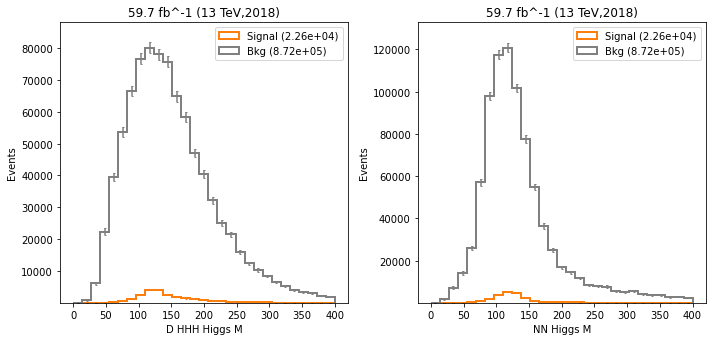

In [9]:
study.quick(trees,varlist=["t6_higgs_m","nn_higgs_m"],xlabels=["D HHH Higgs M","NN Higgs M"],binlist=[np.linspace(0,400,30)]*2,density=0)